# Project2 Part1 - Text Analysis through TFIDF computation


In [5]:
from text_analyzer import read_sonnets, clean_corpus, tf, get_top_k, idf, tf_idf, cosine_sim

import pandas as pd

%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# run text_analyzer.py with default arguments
!python text_analyzer.py


Sonnet 1 TF (Top 20):
[('the', 6), ('thy', 4), ('to', 3), ('might', 2), ('But', 2), ('by', 2), ('tender', 2), ('thine', 2), ('own', 2), ('self', 2), ('worlds', 2), ('And', 2), ('From', 1), ('fairest', 1), ('creatures', 1), ('we', 1), ('desire', 1), ('increase', 1), ('That', 1), ('thereby', 1)]
Corpus TF (Top 20):
[('my', 365), ('the', 356), ('of', 351), ('I', 343), ('to', 330), ('in', 285), ('thy', 258), ('and', 247), ('And', 244), ('that', 237), ('thou', 209), ('with', 163), ('me', 162), ('thee', 161), ('is', 158), ('not', 156), ('love', 155), ('a', 147), ('be', 133), ('all', 107)]
Corpus IDF (Top 20):
[('wane', 5.0369526024136295), ('departest', 5.0369526024136295), ('youngly', 5.0369526024136295), ('bestowst', 5.0369526024136295), ('convertest', 5.0369526024136295), ('herein', 5.0369526024136295), ('wisdom', 5.0369526024136295), ('minded', 5.0369526024136295), ('cease', 5.0369526024136295), ('threescore', 5.0369526024136295), ('harsh', 5.0369526024136295), ('featureless', 5.0369526

## a. Read about argparse.
Look at its implementation in the Python Script. Follow the instruction and answer the questions in the Argparse section.

Argparse helps provide a connection between the file and the commanded terminal so that we are able to parse command-line arguments and options. In turn this helps define arguments that the program expects like specific type or default values.


## b. Read and Clean the data

In [7]:
d_corpus='data/shakespeare_sonnets/'

# return dictionary with keys corresponding to file names and values being the respective contents
corpus = read_sonnets(d_corpus)

# return corpus (dict) with each sonnet cleaned and tokenized for further processing
corpus = clean_corpus(corpus)

In [8]:
corpus['1']

['From',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'That',
 'thereby',
 'beautys',
 'rose',
 'might',
 'never',
 'die',
 'But',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'His',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'But',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 'Feedst',
 'thy',
 'lights',
 'flame',
 'with',
 'selfsubstantial',
 'fuel',
 'Making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'Thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'Thou',
 'that',
 'art',
 'now',
 'the',
 'worlds',
 'fresh',
 'ornament',
 'And',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 'Within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 'And',
 'tender',
 'churl',
 'makst',
 'waste',
 'in',
 'niggarding',
 'Pity',
 'the',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'be',
 'To',
 'eat',
 'the',
 'worlds',
 'due',
 'by',
 'the',
 'grave',
 'and',

## c. TF

In [9]:
# assign 1.txt to variable sonnet to process and find its TF (Note corpus is of type dic, but sonnet1 is just a str)
sonnet1 = corpus['1']

# determine tf of sonnet
sonnet1_tf = tf(sonnet1)

#print(sonnet1_tf)

# get sorted list and slice out top 20
sonnet1_top20 = get_top_k(sonnet1_tf)
# print
# print("Sonnet 1 (Top 20):")
df = pd.DataFrame(sonnet1_top20, columns=["word", "count"])
df.head(20)

,word,count
0,the,6
1,thy,4
2,to,3
3,might,2
4,But,2
5,by,2
6,tender,2
7,thine,2
8,own,2
9,self,2


In [10]:
# TF of entire corpus
flattened_corpus = [word for sonnet in corpus.values() for word in sonnet]
corpus_tf = tf(flattened_corpus)
corpus_top20 = get_top_k(corpus_tf)
# print
# print("Corpus TF (Top 20):")
df = pd.DataFrame(corpus_top20, columns=["word", "count"])
df.head(20)

,word,count
0,my,365
1,the,356
2,of,351
3,I,343
4,to,330
5,in,285
6,thy,258
7,and,247
8,And,244
9,that,237


### Q: Discussion
Do you believe the most frequent words would discriminate between documents well? Why or why not? Any thoughts on how we can improve this representation? Does there appear to be any ‘noise’? If so, where? If not, it should be clear by the end of the assignment.

The most frequent words in both documents are short words like "the" and "and" which do not tell a lot about the contents of the document thus it would not discriminate well between documents. One way of improving the representation is be eliminating the most common words in the english language from our data. The noise is made up of the most common words in the english language which are present in our data are most seen in the top 5 most frequent words in the files, which is most frequently seen in the entire corpus. 

## d. IDF

In [11]:
# IDF of corpus
corpus_idf = idf(corpus)
corpus_tf_ordered = get_top_k(corpus_idf)
# print top 20 to add to report
df = pd.DataFrame(corpus_tf_ordered, columns=["word", "score"])
df.head(20)

,word,score
0,wane,5.036953
1,departest,5.036953
2,youngly,5.036953
3,bestowst,5.036953
4,convertest,5.036953
5,herein,5.036953
6,wisdom,5.036953
7,minded,5.036953
8,cease,5.036953
9,threescore,5.036953


### Q: observe and briefly comment on the difference in top 20 lists (comparing TF of corpus vs its IDF).

The TF list has noise comprised by the most common words in the corpus that are not unique these include words that help connect sentences like "and" or "of" so the top 20 words in the Tf are not unique. In contrast the top 20 list in the IDF gets rid of the common words so that none of them appear in the top twenty instead all the words are unique in the corpus which means this that the IDF is a way to get rid of the noise and it comes close to identify the unique words in the corpus that appear the most even if they dont appear more than words like "and" or "of".


## e. TF-IDF

In [12]:
# TFIDF of Sonnet1 w.r.t. corpus
sonnet1_tfidf = tf_idf(corpus_idf, sonnet1_tf)

sonnet1_tfidf_ordered = get_top_k(sonnet1_tfidf)
# print
# print("Sonnet 1 TFIDF (Top 20):")
df = pd.DataFrame(sonnet1_tfidf_ordered, columns=["word", "score"])
df.head(20)

,word,score
0,worlds,7.301316
1,tender,6.490386
2,lights,5.036953
3,selfsubstantial,5.036953
4,fuel,5.036953
5,famine,5.036953
6,foe,5.036953
7,herald,5.036953
8,gaudy,5.036953
9,buriest,5.036953


### Q. What is different with this list than just using TF?

The difference with the list this list and just using the TF is that when you use only the TF the list produced are the words that are highly common in the english language like "my", "the" and "of" which are not useful when figuring out which unique word appears the most in the corpus which means the list does not get rid of the noise made by containing the most commmon words in the english dictionary. In contrast, This recent list gets rid of the noise that is caused by the most common words in the corpus so that the top 20 words are unique words that are not part of common words like "and" or "the" this can be seen in the list as the first three words are "worlds", "tender", and "lights".


## f. Compare all documents

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

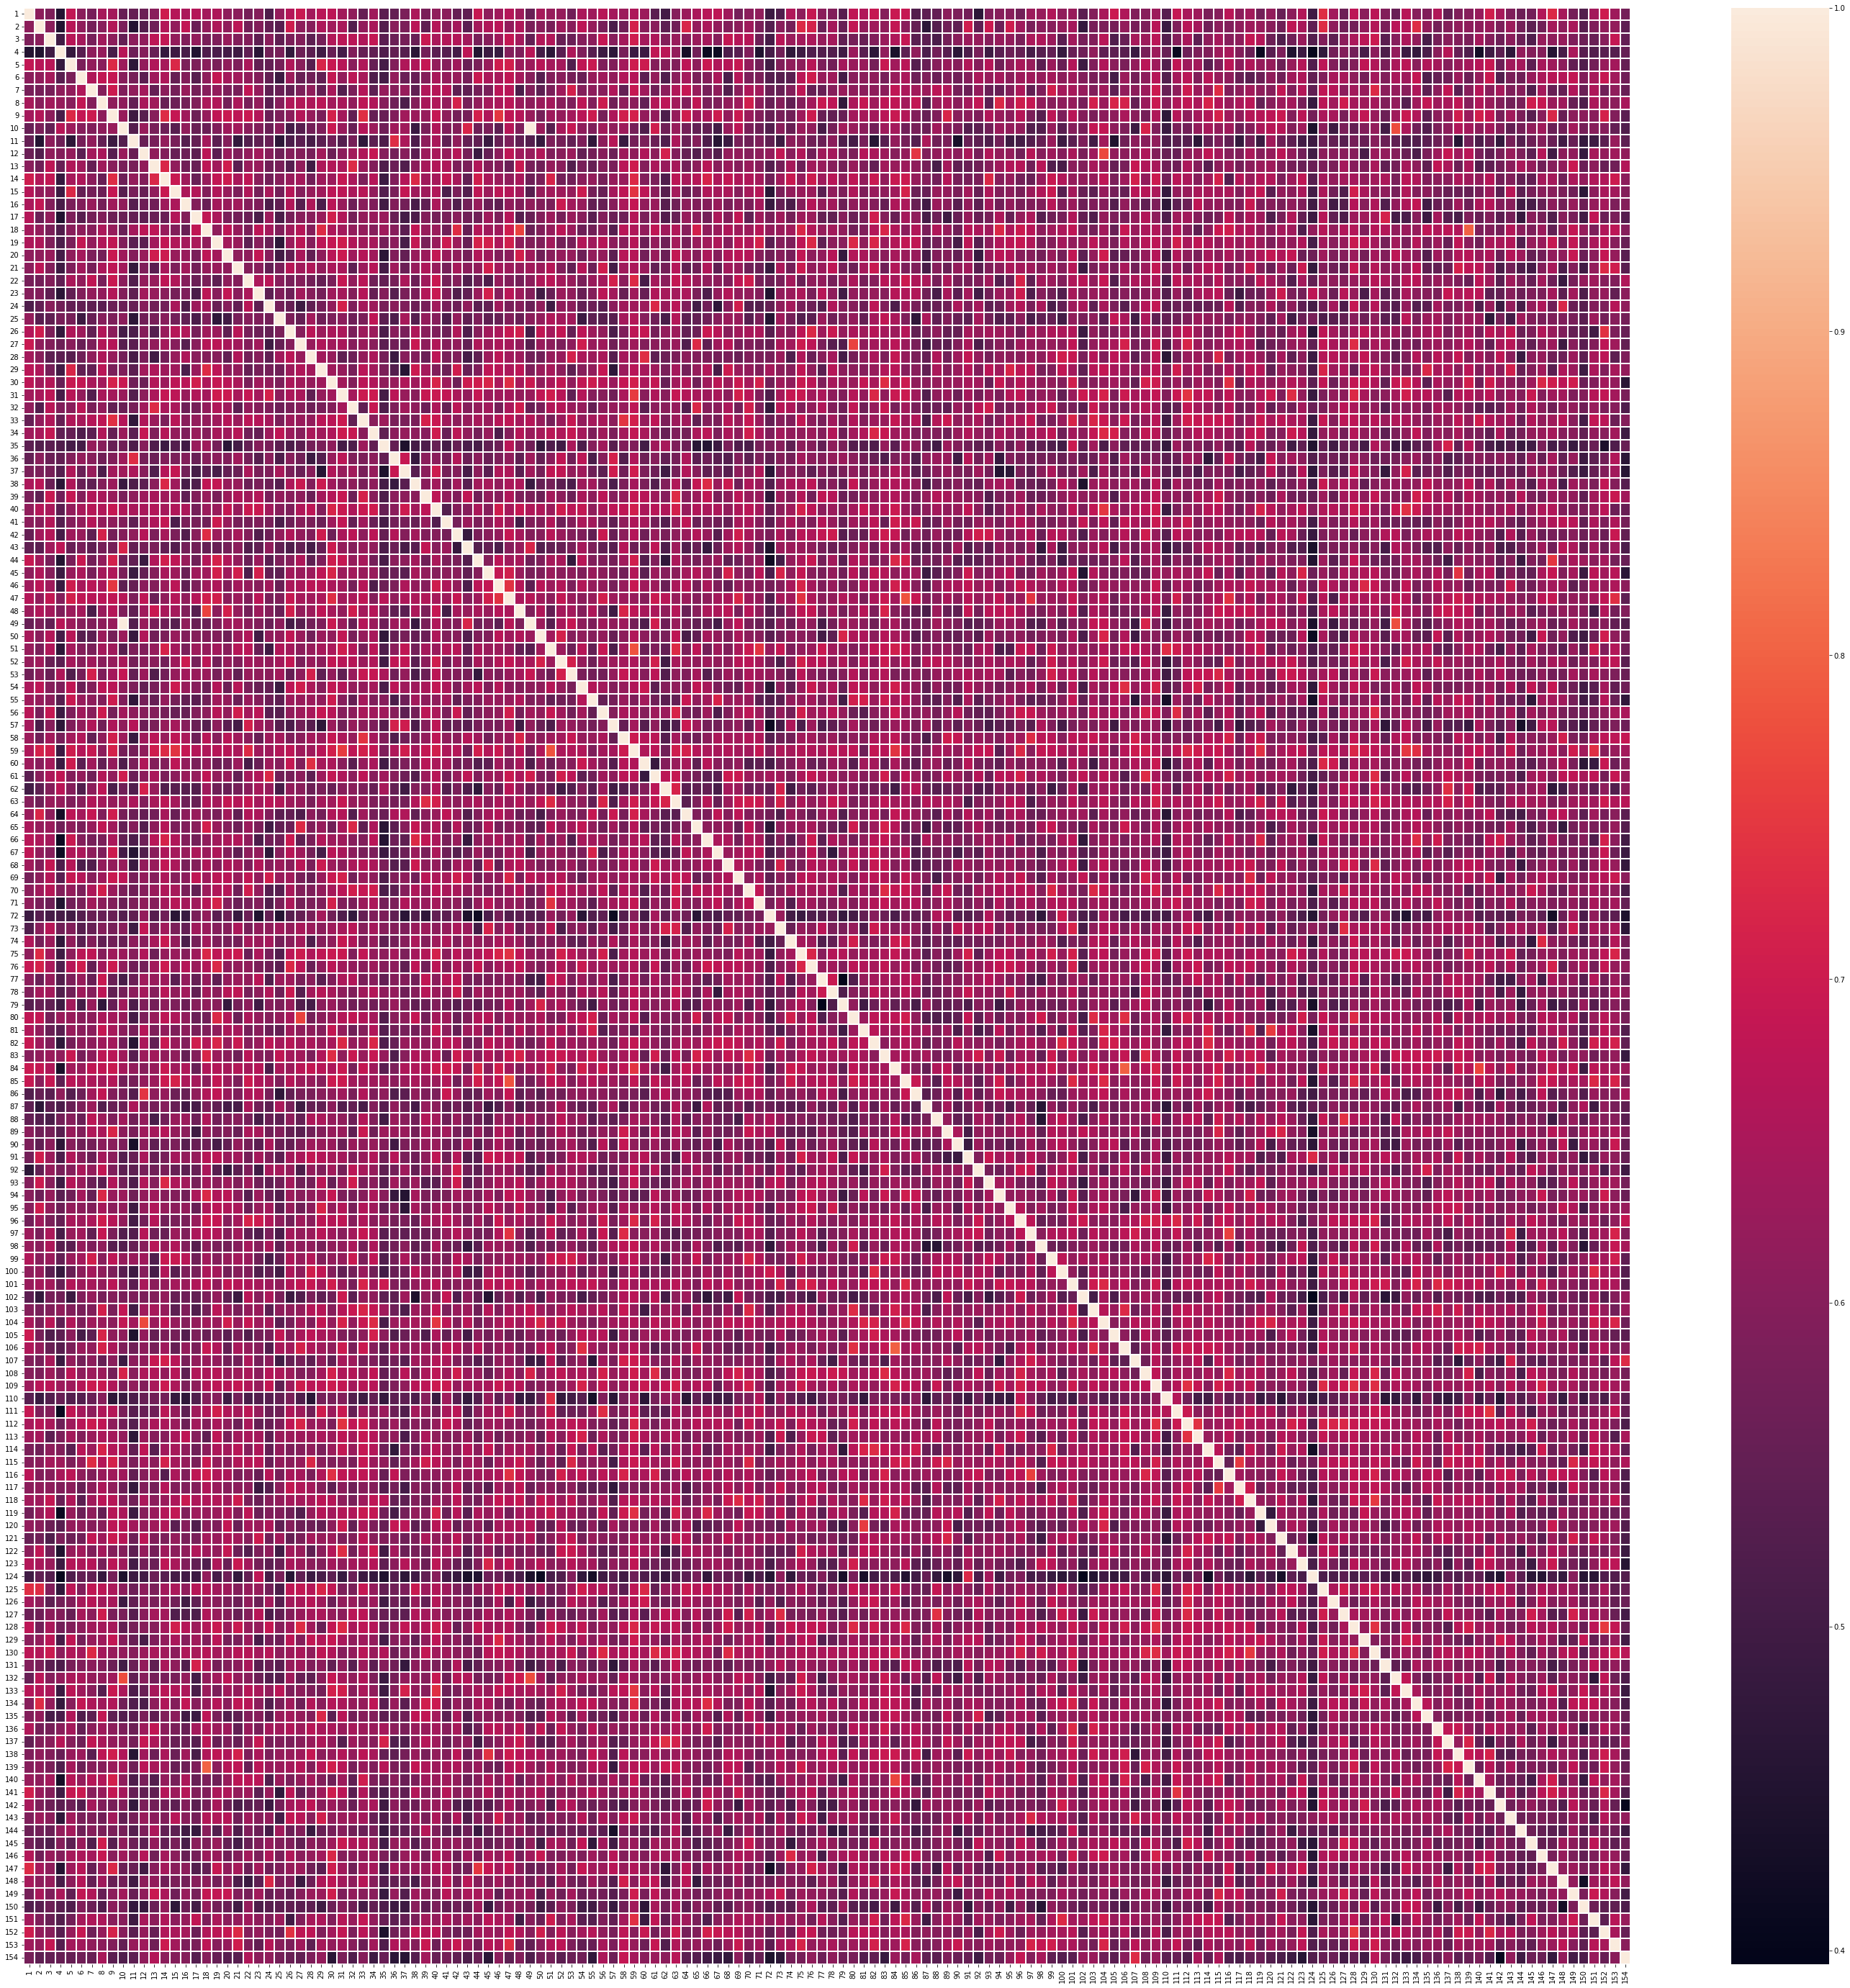

In [13]:
# Visualize as a heatmap
# Define a list of sonnets we are interested to observe - DONE
sonnets = list(corpus.keys())
sonnets = sorted(sonnets, key = int)

# list of cosine similarities
cos_list = []

# Calculate the cosine similarity between each vector
for curr_key in corpus:
    curr_sonnet_tf = tf(corpus[curr_key])
    curr_sonnet_tfidf = tf_idf(corpus_idf, curr_sonnet_tf)
    curr_sonnet_list = []
   
    for comp_key in corpus:
        comp_sonnet_tf = tf(corpus[comp_key])
        comp_sonnet_tfidf = tf_idf(corpus_idf, comp_sonnet_tf)
        sonnet_sim = cosine_sim(curr_sonnet_tfidf, comp_sonnet_tfidf)
        curr_sonnet_list.append(sonnet_sim)
   
    cos_list.append(curr_sonnet_list)
       
# libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# Create a dataset
df = pd.DataFrame(cos_list, index=sonnets, columns=sonnets)

# plot a heatmap with annotation
fig, ax = plt.subplots(figsize=(50,50))
#sns.heatmap(df, annot=True, annot_kws={"size": 1})
sns.heatmap(df, linewidths=.15)


### Q. Observe the heatmap. What insight do you get from it?

The white line diagonal means that every sonnet is the same as it self which is normal. There is two extra white tiles one at (49,10) and one at (10,49) which means that between all the sonnets 49 and 10 have the most similar words where it almost has a score of 1 which means both have a almost identical amount of words. Other notable observations include sonnets  4, 11, 25, 35, 72, 87, 110, 124  when you look at the y axis of the heat map and follow the line across the x axis meaning (4,1), (4,2)...,(4,154) and do the same with the other sonnets in this list it is seen that these sonnets have the lowest similarity scores with the rest of the sonnets this is especially true for 124 where the whole line from (124,1) to (124,154) is dark enough to notice from the others. There is no clear sonnet that is similar to every other sonnet because at most every comparison score is at the highest close to 0.8 with the exception of (49,10) and (10,49).